# this script has the following
1. Import data and libraries
2. Data wrangling
3. Data cleaning¶
4. Plotting a choropleth


# import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json


In [3]:
%matplotlib inline

In [4]:
#import US JSON
country_geo= r'/Users/rachelmoreland/Achievement 6 practice/Data/us-states.json'

In [5]:
#city JSON

city_geo= r'/Users/rachelmoreland/Achievement 6 practice/Data/NYC.geojson'

In [6]:
city_geo_2 = r'/Users/rachelmoreland/Achievement 6 practice/Data/nyc-zip-code-tabulation-areas-polygons.geojson'

In [7]:
country_geo

'/Users/rachelmoreland/Achievement 6 practice/Data/us-states.json'

In [8]:
city_geo

'/Users/rachelmoreland/Achievement 6 practice/Data/NYC.geojson'

In [9]:
#import csv
#folder shortcut
path = r'C:\Users\hp\Documents\Citi Bike'

In [10]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'), index_col = False)

In [11]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [12]:
station_counts = citi.groupby('start_station_id')['ride_start_date'].count().reset_index()

In [13]:
#how many rides occured at that station
station_counts

,start_station_id,ride_start_date
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
...,...,...
325,2017,90
326,2021,150
327,2022,96
328,2023,74


In [14]:
#how many rides happened each day at each station
station_counts_day = citi.groupby(['start_station_id', 'day_of_week'])['ride_start_date'].count()


In [15]:
station_counts_day

start_station_id  day_of_week
72                Fri            31
                  Mon            23
                  Sat            23
                  Sun            25
                  Thu            21
                                 ..
3002              Sat            37
                  Sun            39
                  Thu            20
                  Tue            26
                  Wed            31
Name: ride_start_date, Length: 2276, dtype: int64

In [16]:
station_counts_day.head(20)

start_station_id  day_of_week
72                Fri            31
                  Mon            23
                  Sat            23
                  Sun            25
                  Thu            21
                  Tue            16
                  Wed            19
79                Fri            22
                  Mon            15
                  Sat            13
                  Sun            11
                  Thu            24
                  Tue            16
                  Wed            21
82                Fri             6
                  Mon            12
                  Sat             6
                  Sun            11
                  Thu             6
                  Tue             8
Name: ride_start_date, dtype: int64

In [17]:
station_counts.head(50)

,start_station_id,ride_start_date
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
5,119,7
6,120,25
7,127,253
8,128,264
9,137,76


In [18]:
station_counts.max()

start_station_id    3002
ride_start_date      475
dtype: int64

In [19]:
station_counts.min()

start_station_id    72
ride_start_date      3
dtype: int64

In [20]:
station_counts.mean()

start_station_id    447.809091
ride_start_date     130.281818
dtype: float64

<Axes: ylabel='Count'>

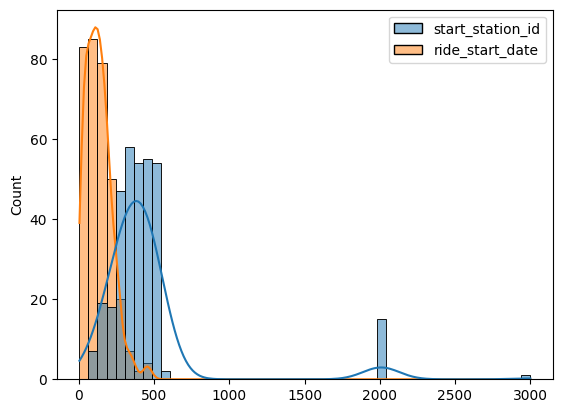

In [21]:
#looking into station counts
sns.histplot(station_counts, bins=50, kde = True) 

In [22]:
# select only needed columns
columns = ["day_of_week","start_hour","start_station_id","start_station_longitude","start_station_latitude","ride_start_date"]

In [23]:
citi_1 = citi[columns]

In [24]:
citi_1.head()

,day_of_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,ride_start_date
0,Mon,18,523,-73.991382,40.754666,2013-09-09
1,Thu,18,257,-74.002472,40.719392,2013-09-12
2,Wed,19,479,-73.991255,40.760193,2013-09-18
3,Sat,11,527,-73.974347,40.743156,2013-09-28
4,Fri,22,293,-73.990765,40.730287,2013-09-27


In [25]:
type(citi_1)

pandas.core.frame.DataFrame

In [26]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_longitude  42993 non-null  float64
 4   start_station_latitude   42993 non-null  float64
 5   ride_start_date          42993 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [27]:
# Check for missing values

citi_1.isnull().sum()

day_of_week                0
start_hour                 0
start_station_id           0
start_station_longitude    0
start_station_latitude     0
ride_start_date            0
dtype: int64

In [28]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [29]:
#converting to date time 
file_path = os.path.join(path, '02 Data','prepared data','citi_4.csv')

In [30]:
parse_dates = ['ride_start_date']


In [31]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [32]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   day_of_week              42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_station_id         42993 non-null  int64         
 5   start_station_name       42993 non-null  object        
 6   start_station_latitude   42993 non-null  float64       
 7   start_station_longitude  42993 non-null  float64       
 8   end_station_id           42993 non-null  int64         
 9   end_station_name         42993 non-null  object        
 10  end_station_latitude     42993 non-null  float64       
 11  end_station_longitude    42993 non-null  float64       
 12  trip_duration            42993 n

In [33]:
# Calculate rides per day for each station
station_daily_counts = citi.groupby(['start_station_id', citi['ride_start_date'].dt.date])['ride_start_date'].count()

In [34]:
#rides taken each day at each station
station_daily_counts

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06         10
                                     ..
3002              2013-09-26          9
                  2013-09-27          7
                  2013-09-28         12
                  2013-09-29          6
                  2013-09-30          3
Name: ride_start_date, Length: 8667, dtype: int64

In [35]:
station_daily_counts.head(35)

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06         10
                  2013-09-07          6
                  2013-09-08          7
                  2013-09-09          5
                  2013-09-10          7
                  2013-09-11          7
                  2013-09-12          7
                  2013-09-13          7
                  2013-09-14          7
                  2013-09-15          8
                  2013-09-16          4
                  2013-09-17          4
                  2013-09-19          1
                  2013-09-20          6
                  2013-09-21          5
                  2013-09-22          5
                  2013-09-23          6
                  2013-09-24          4
                  2013-09-25          8
                  2013-09-26          5
      

In [36]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()


In [37]:
#checking code
station_avg_rides_per_day

,start_station_id,ride_start_date
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667
...,...,...
325,2017,3.000000
326,2021,5.357143
327,2022,3.310345
328,2023,3.217391


In [38]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'ride_start_date':'average_daily_rides'})

In [39]:
#merging data sets
citi_1.head()

,day_of_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,ride_start_date
0,Mon,18,523,-73.991382,40.754666,2013-09-09
1,Thu,18,257,-74.002472,40.719392,2013-09-12
2,Wed,19,479,-73.991255,40.760193,2013-09-18
3,Sat,11,527,-73.974347,40.743156,2013-09-28
4,Fri,22,293,-73.990765,40.730287,2013-09-27


In [40]:
station_avg_rides_per_day.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [41]:
station_avg_rides_per_day.shape

(330, 2)

In [42]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)


In [43]:
# lat and long for each station
station_loc = citi.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()

In [44]:
station_loc

,start_station_latitude,start_station_longitude
start_station_id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497
...,...,...
2017,40.750224,-73.971214
2021,40.759291,-73.988597
2022,40.758491,-73.959206


In [45]:
# each station with lat and longitude and avg daily rides
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [46]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [47]:
data_to_plot = df_merged[['start_station_id','average_daily_rides',]]
data_to_plot.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [48]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [49]:
df_merged['average_daily_rides'].max()

np.float64(15.833333333333334)

In [50]:
df_merged['average_daily_rides'].mean()

np.float64(4.609605418741775)

<Axes: xlabel='average_daily_rides', ylabel='Count'>

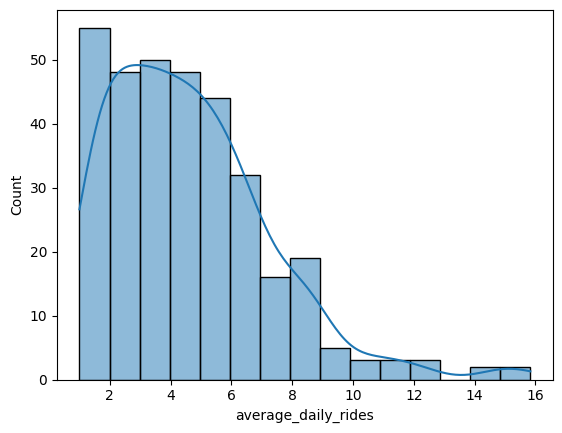

In [51]:
#AVG DAILY RIDES BINS
sns.histplot(df_merged['average_daily_rides'], bins=15, kde = True)

In [52]:
nyc_map

In [53]:
import folium
import geopandas as gpd
from shapely.geometry import Point

ModuleNotFoundError: No module named 'geopandas'

In [54]:
start_station_id.forEach(station => {
  var marker = new mapboxgl.Marker()
    .setLngLat([start_station_longitude.longitude, start_station_latitude.latitude])
    .addTo(nyc_map);
});

SyntaxError: invalid syntax (3361212776.py, line 1)

In [55]:
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [56]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [57]:
data_to_plot_2.head()

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776


In [58]:
# trying to get a NYC map imported and the lat and long of the zip codes
import folium
from folium.plugins import MarkerCluster


In [59]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [60]:
choropleth_layer = folium.Choropleth(
    geo_data=city_geo_2,
    name="Choropleth Map"
).add_to(map_zip)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rachelmoreland/Achievement 6 practice/Data/nyc-zip-code-tabulation-areas-polygons.geojson'

In [ ]:
folium.LayerControl().add_to(map_zip)

In [ ]:
map_zip

In [ ]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [ ]:
df_merged.to_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'))

In [ ]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="lightgreen", icon="bicycle")
    ).add_to(map_zip)








In [ ]:

# Add a layer control
folium.LayerControl().add_to(map_zip)

In [ ]:
map_zip

In [ ]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
area_geojson = r'/Users/rachelmoreland/Achievement 6 practice/Data/nyc-zip-code-tabulation-areas-polygons.geojson'

In [ ]:
geojson_gdf = gpd.read_file(area_geojson)

In [ ]:
# Convert bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_merged["start_station_longitude"], df_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs=geojson_gdf.crs)

In [ ]:
merged_gdf = gpd.sjoin(bike_stations_gdf, geojson_gdf, predicate="within")

In [ ]:
merged_gdf

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id
0,72,40.767272,-73.993929,5.642857,POINT (-73.99393 40.76727),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
24,173,40.760647,-73.984427,5.233333,POINT (-73.98443 40.76065),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
75,281,40.764397,-73.973715,5.300000,POINT (-73.97371 40.76440),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
138,352,40.763406,-73.977225,5.500000,POINT (-73.97722 40.76341),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
202,422,40.770513,-73.988038,4.620690,POINT (-73.98804 40.77051),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,POINT (-73.98860 40.75929),105,106,10036,New York,NY,Manhattan,36,061,0,16418.606668,1.139511e+07,http://nyc.pediacities.com/Resource/PostalCode...
273,499,40.769155,-73.981918,9.100000,POINT (-73.98192 40.76916),89,90,10023,New York,NY,Manhattan,36,061,0,22471.385989,1.521271e+07,http://nyc.pediacities.com/Resource/PostalCode...
309,538,40.757952,-73.977876,2.965517,POINT (-73.97788 40.75795),110,111,10020,New York,NY,Manhattan,36,061,0,3612.203611,6.972970e+05,http://nyc.pediacities.com/Resource/PostalCode...
320,2006,40.765909,-73.976342,4.482759,POINT (-73.97634 40.76591),82,83,00083,Central Park,NY,Manhattan,36,061,0,32710.772800,3.830099e+07,http://nyc.pediacities.com/Resource/PostalCode...


In [ ]:
merged_gdf_1=merged_gdf.drop(columns=["geometry","index_right","OBJECTID","PO_NAME","STATE","borough","ST_FIPS","CTY_FIPS","BLDGpostalCode","Shape_Leng","Shape_Area","@id"])

In [ ]:
merged_gdf_1

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019
...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,10036
273,499,40.769155,-73.981918,9.100000,10023
309,538,40.757952,-73.977876,2.965517,10020
320,2006,40.765909,-73.976342,4.482759,00083


In [ ]:
nyc_map

In [ ]:
choropleth_layer = folium.Choropleth(
    geo_data=area_geojson,
    data=merged_gdf_1,
    columns=["postalCode", "average_daily_rides"],
    key_on="feature.properties.postalCode",  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Daily Use"
).add_to(nyc_map)

In [ ]:
nyc_map

In [ ]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="blue", icon="bicycle")
    ).add_to(nyc_map)

In [ ]:
nyc_map

In [ ]:
nyc_map.save('plot_data.html')

In [ ]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [ ]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_5.csv'))

In [ ]:
merged_gdf_1.head()

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019


In [ ]:
merged_gdf_1.to_csv(os.path.join(path, '02 Data','prepared data', 'postalcodes'))

# this map answered my questions about what stations are the busiest and where

From knowing what stations have the busiest average daily rides I think put it into zip codes to know what zip codes have the busiest and least busy daily action.